## Clean_Data
This script is used to import the data, clean it, integrate it, and do some basic feature building, before pickeling the final df

## get and clean the stock Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

#read in the raw stock data
basedir = '/Users/bono/demo_projects/weather_stocks/'
file = basedir+'data/PerformanceGraphExport.xls'
df_stocks = pd.read_excel (file)
#rename the columns 
df_stocks.columns = ['DATE', 'TR', 'NTR','DJIA']
#clean the rows 
df_stocks = df_stocks.iloc[6:]
df_stocks = df_stocks.iloc[0:2842]
#convert to datetime and remove the time
df_stocks['DATE'] =  pd.to_datetime(df_stocks['DATE'], format='%d%b%Y')
#index by date
df_stocks.set_index('DATE',inplace=True)
df_stocks.head()

,TR,NTR,DJIA
DATE,,,
2009-10-31,16985.7,15820.6,9712.73
2009-11-01,16985.7,15820.6,9712.73
2009-11-02,17119.8,15945.5,9789.44
2009-11-03,17089.2,15917,9771.91
2009-11-04,17152,15972.7,9802.14


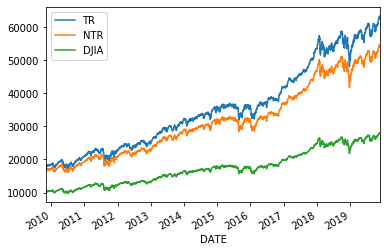

In [35]:
df_stocks.plot()

## get and clean the weather Data

In [36]:
file = basedir+'data/centralpark.txt'
df_weather = pd.read_csv(file)
#convert to datetime and remove the time
df_weather['DATE'] =  pd.to_datetime(df_weather['DATE'])
#index by date
df_weather.set_index('DATE',inplace=True)
df_weather

,STATION,AWND,PRCP,SNOW,SNWD,TAVG,TSUN,WT01,WT02,WT03,...,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-13,USW00094728,8.05,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,USW00094728,3.36,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-15,USW00094728,7.83,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-16,USW00094728,6.49,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,USW00094728,3.80,0.57,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
2010-01-18,USW00094728,NaN,0.05,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-19,USW00094728,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-20,USW00094728,6.26,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-21,USW00094728,3.13,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


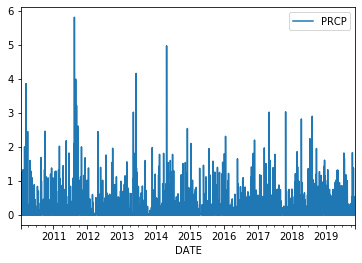

In [37]:
df_weather.plot(y='PRCP')

## join the weather data
taking an inner join because we only want stock data when we have weather data, and vice versa

In [38]:
df_all = df_weather.join(df_stocks)

In [39]:
df_all

,STATION,AWND,PRCP,SNOW,SNWD,TAVG,TSUN,WT01,WT02,WT03,...,WT13,WT14,WT16,WT17,WT18,WT19,WT22,TR,NTR,DJIA
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-13,USW00094728,8.05,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18794.7,17473,10680.8
2010-01-14,USW00094728,3.36,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18847.1,17521.7,10710.5
2010-01-15,USW00094728,7.83,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18675.1,17360.3,10609.6
2010-01-16,USW00094728,6.49,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18675.1,17360.3,10609.6
2010-01-17,USW00094728,3.80,0.57,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,18675.1,17360.3,10609.6
2010-01-18,USW00094728,NaN,0.05,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,18675.1,17360.3,10609.6
2010-01-19,USW00094728,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,18878.9,17549.7,10725.4
2010-01-20,USW00094728,6.26,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18669.5,17353.4,10603.1
2010-01-21,USW00094728,3.13,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18293.9,17004.3,10389.9


## Do some basic feature building and check out some basic plots

In [40]:
#At first, we will be looking at daily changes in stock price
df_all['DJIA_d1'] = df_all['DJIA'].diff()

In [41]:
#normalize some of the data (mostly for plotting)
df_all['DJIA_d1_Norm'] = df_all['DJIA_d1']/df_all['DJIA_d1'].max()
df_all['DJIA_NORM'] = df_all['DJIA']/df_all['DJIA'].max()
df_all['PRCP_NORM'] = df_all['PRCP']/df_all['PRCP'].max()


## Check out some basic plots

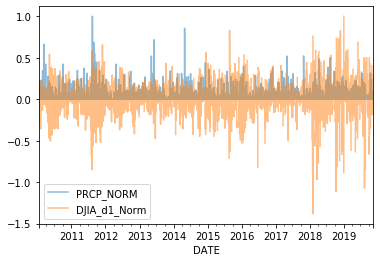

In [49]:
df_all.plot(y=['PRCP_NORM','DJIA_d1_Norm'],alpha=0.5)


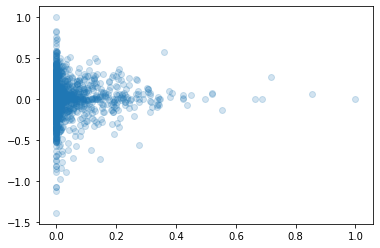

In [50]:
plt.scatter(df_all['PRCP_NORM'], df_all['DJIA_d1_Norm'],alpha=0.2)